In [1]:
#Code to benchmark cosmocnc. It runs the tutorial on GitHub.
import numpy as np
import pylab as pl
import cosmocnc

import os
os.environ['PATH_TO_COSMOPOWER_ORGANIZATION'] = '/Users/boris/Work/CLASS-SZ/SO-SZ/cosmopower-organization'

PATH_TO_COSMOPOWER_ORGANIZATION is already set to: /Users/boris/Work/CLASS-SZ/SO-SZ/cosmopower-organization


In [2]:
%%time
cnc_params = cosmocnc.cnc_params_default
scal_rel_params = cosmocnc.scaling_relation_params_default
cosmo_params = cosmocnc.cosmo_params_default
#Catalogue and observables
cnc_params["cluster_catalogue"] = "SO_sim_0"
cnc_params["observables"] = [["q_so_sim"],["p_so_sim"]]
cnc_params["obs_select"] = "q_so_sim"
#Mass and redshift range
cnc_params["M_min"] = 1e13
cnc_params["M_max"] = 1e16
cnc_params["z_min"] = 0.01
cnc_params["z_max"] = 3.
#Selection observable range
cnc_params["obs_select_min"] = 5. #selection threshold
cnc_params["obs_select_max"] = 200.
#Precision parameters
cnc_params["n_points"] = 16384 #number of points in which the mass function at each redshift (and all the convolutions) is evaluated
cnc_params["n_points_data_lik"] = 2048 #number of points in which the mass function at each redshift (and all the convolutions) is evaluated
cnc_params["n_z"] = 100
cnc_params["sigma_mass_prior"] = 10
cnc_params["delta_m_with_ref"] = True
cnc_params["scalrel_type_deriv"] = "numerical"
cnc_params["downsample_hmf_bc"] = 2
cnc_params["compute_abundance_matrix"] = True
#Parallelisation
cnc_params["number_cores_hmf"] = 1
cnc_params["number_cores_abundance"] = 1
cnc_params["number_cores_data"] = 8
cnc_params["parallelise_type"] = "redshift"
#Cosmology parameters
cnc_params["cosmology_tool"] = "classy_sz"
cnc_params["cosmo_param_density"] = "critical"
cnc_params["cosmo_model"] = "lcdm"
cnc_params["hmf_calc"] = "cnc"
cnc_params["interp_tinker"] = "linear" #"linear" or "log" # only used if internal hmf is used
#Parameters for the binned likelihood
cnc_params["binned_lik_type"] = "z_and_obs_select"
cnc_params["bins_edges_z"] = np.linspace(cnc_params["z_min"],cnc_params["z_max"],9)
cnc_params["bins_edges_obs_select"] = np.exp(np.linspace(np.log(cnc_params["obs_select_min"]),np.log(cnc_params["obs_select_max"]),7))
#Stacked data, set to False for now
cnc_params["stacked_likelihood"] = False
cnc_params["stacked_data"] = ["p_so_sim_stacked"] #list of stacked data
cnc_params["compute_stacked_cov"] = True
#Initialisation
cnc_params["data_lik_from_abundance"] = False
cnc_params["likelihood_type"] = "unbinned"
scal_rel_params["corr_lnq_lnp"] = 0.
scal_rel_params["bias_sz"] = 0.8
number_counts = cosmocnc.cluster_number_counts()
number_counts.cnc_params = cnc_params
number_counts.scal_rel_params = scal_rel_params
number_counts.cosmo_params = cosmo_params
number_counts.initialise()
#Computation of the number counts
number_counts.get_number_counts()
dn_dz = number_counts.n_z
dn_dSNR = number_counts.n_obs
z = number_counts.redshift_vec
SNR = number_counts.obs_select_vec

PATH_TO_CLASS_SZ_DATA not set.
Defaulting to: /Users/boris/class_sz_data_directory
Found class_sz_data_directory directory with all repositories at: /Users/boris/class_sz_data_directory
PATH_TO_CLASS_SZ_DATA is not correctly set. Setting it now...
PATH_TO_CLASS_SZ_DATA is set to /Users/boris/class_sz_data_directory
Required directories already exist. Skipping download.


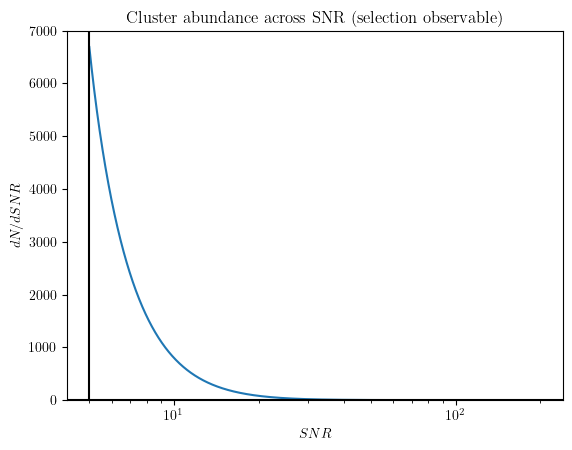

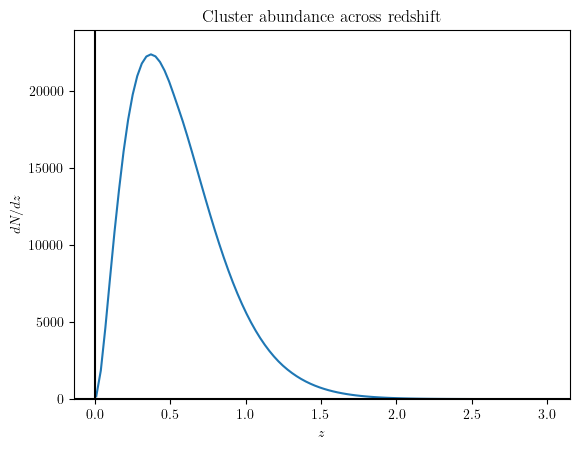

In [3]:
pl.rc('text', usetex=True)
pl.rc('font', family='serif')
pl.figure()
pl.semilogx(SNR,dn_dSNR,color="tab:blue")
pl.xlabel("$SNR$")
pl.ylabel("$dN / d SNR$")
pl.axvline(x=5.,color="k")
pl.axhline(y=0.,color="k")
pl.title("Cluster abundance across SNR (selection observable)")
pl.ylim([0,7000])
pl.savefig("figures/benchmark_abundance_snr.pdf")
pl.show()
pl.figure()
pl.plot(z,dn_dz,color="tab:blue")
pl.xlabel("$z$")
pl.ylabel("$dN / dz$")
pl.axvline(x=0.,color="k")
pl.axhline(y=0.,color="k")
pl.ylim(0,24000)
pl.title("Cluster abundance across redshift")
pl.savefig("figures/benchmark_abundance_z.pdf")
pl.show()

<>:11: DeprecationWarning: invalid escape sequence \m
<>:11: DeprecationWarning: invalid escape sequence \m
/var/folders/h0/4_tf3pcn1h32ks9grh325v400000gn/T/ipykernel_97616/816788447.py:11: DeprecationWarning: invalid escape sequence \m
  ax.set_xlabel("$q_{\mathrm{obs}}$")


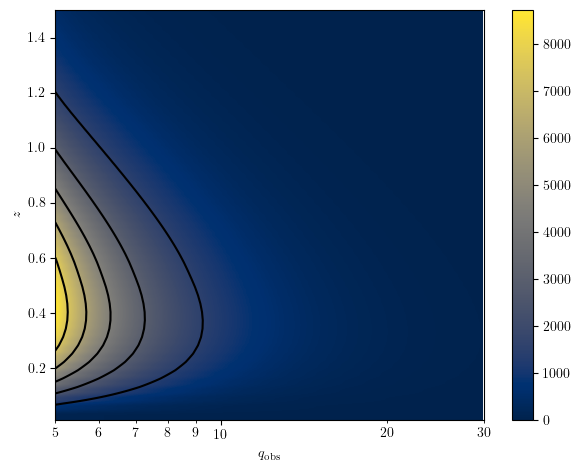

In [4]:
abundance_matrix = np.flip(number_counts.abundance_matrix,axis=0)
import matplotlib.ticker as mticker
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import StrMethodFormatter
fig = pl.figure()
ax = fig.add_subplot()
im = ax.imshow(abundance_matrix,extent=[SNR[0],SNR[-1],z[0],z[-1]],cmap="cividis",aspect=0.5)
fig.colorbar(im,ax=ax)
ax.contour(np.flip(abundance_matrix,axis=0),colors=["k","k","k","k"],extent=[SNR[0],SNR[-1],z[0],z[-1]])
ax.set_xscale("log")
ax.set_xlabel("$q_{\mathrm{obs}}$")
ax.set_ylabel("$z$")
ax.set_xlim([5.,30.])
ax.set_ylim([0.01,1.5])
ax.xaxis.set_minor_formatter(mticker.ScalarFormatter())
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
fig.tight_layout()
pl.savefig("figures/benchmark_abundance_2d.pdf")
pl.show()

In [5]:
n_tot_theory = number_counts.n_tot
n_tot_obs = number_counts.catalogue.n_tot
print("Predicted total number of clusters in the catalogue:",n_tot_theory,"+-",np.sqrt(n_tot_theory))
print("Observed total number of clusters in the catalogue:",n_tot_obs)
#Binned abundance
cnc_params["likelihood_type"] = "binned"
cnc_params["obs_select_min"] = 5.000
number_counts.cnc_params = cnc_params
log_lik = number_counts.get_log_lik() #Evaluate the binned likelihood
bins_centres_z = number_counts.bins_centres_z #z bins centres
bins_centres_snr = number_counts.bins_centres_obs #SNR bins centres
n_binned_theory = number_counts.n_binned #Theoretical prediction for the number counts in the SNR-z bins
n_binned_obs = number_counts.n_binned_obs #Actual number counts in the catalogue
n_tot_bins_theory = np.sum(n_binned_theory) #Theoretical prediction for the total number of clusters in the bins
n_tot_bins_obs = np.sum(n_binned_obs) #Actual number in the catalogue
n_binned_snr_theory = np.sum(n_binned_theory,axis=0) #Theoretical prediction for the number counts in the SNR bins
n_binned_snr_obs = np.sum(n_binned_obs,axis=0) #Actual number in the catalogue
n_binned_z_theory = np.sum(n_binned_theory,axis=1) #Theoretical prediction for the number counts in the z bins
n_binned_z_obs = np.sum(n_binned_obs,axis=1) #Actual number in the catalogue
print("")
print("Predicted total number of clusters in the bins = ",n_tot_bins_theory,"+-",np.sqrt(n_tot_bins_theory))
print("Observed total number of clusters in the bins = ",n_tot_bins_obs)

Predicted total number of clusters in the catalogue: 15633.942224663508 +- 125.03576378246149
Observed total number of clusters in the catalogue: 15683

Predicted total number of clusters in the bins =  15621.301603951817 +- 124.98520554030311
Observed total number of clusters in the bins =  15683.0


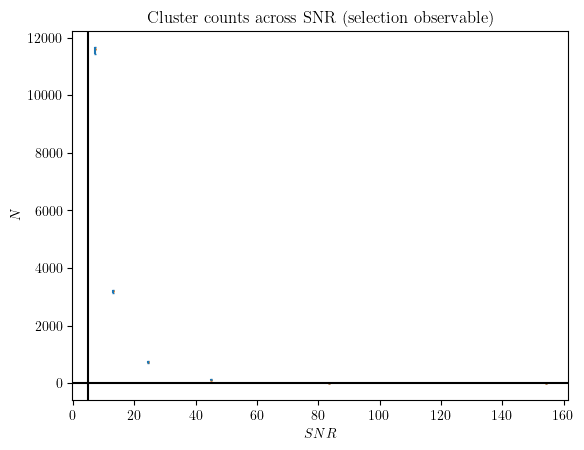

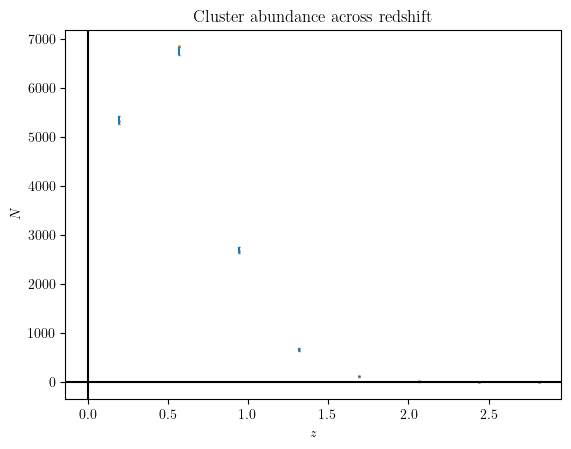

In [6]:
size_marker = 1
pl.figure()
pl.errorbar(bins_centres_snr,n_binned_snr_theory,yerr=np.sqrt(n_binned_snr_theory),color="tab:blue",
            linestyle="none",fmt="",capsize=size_marker)
pl.scatter(bins_centres_snr,n_binned_snr_obs,color="tab:orange",s=size_marker)
pl.xlabel("$SNR$")
pl.ylabel("$N$")
pl.axvline(x=5.,color="k")
pl.axhline(y=0.,color="k")
pl.title("Cluster counts across SNR (selection observable)")
pl.savefig("figures/benchmark_abundance_binned_snr.pdf")
pl.show()
pl.figure()
pl.errorbar(bins_centres_z,n_binned_z_theory,yerr=np.sqrt(n_binned_z_theory),color="tab:blue",
            linestyle="none",fmt="",capsize=size_marker)
pl.scatter(bins_centres_z,n_binned_z_obs,color="tab:orange",s=size_marker)
pl.xlabel("$z$")
pl.ylabel("$N$")
pl.axvline(x=0.,color="k")
pl.axhline(y=0.,color="k")
pl.title("Cluster abundance across redshift")
pl.savefig("figures/benchmark_abundance_binned_z.pdf")
pl.show()

In [7]:
#Cluster catalogue
catalogue = number_counts.catalogue
q_obs = catalogue.catalogue["q_so_sim"] #tSZ signal-to-noise
p_obs = catalogue.catalogue["p_so_sim"] #CMB lensing signal-to-noise
z = catalogue.catalogue["z"] #Redshift
#Stacked observable
cnc_params["likelihood_type"] = "unbinned"
cnc_params["observables"] = [["q_so_sim"]] #There is only one cluster-by-cluster mass observable.
cnc_params["data_lik_from_abundance"] = False #So that the backward convolutional approach is followed (necessary for the stacked likelihood)
cnc_params["stacked_likelihood"] = True
cnc_params["stacked_data"] = ["p_so_sim_stacked"] #List of stacked data
cnc_params["compute_stacked_cov"] = True
number_counts.cnc_params = cnc_params
number_counts.initialise()
log_lik = number_counts.get_log_lik()
p_stacked_obs = number_counts.catalogue.stacked_data["p_so_sim_stacked"]["data_vec"]
p_stacked_theory = number_counts.stacked_model["p_so_sim_stacked"]
p_stacked_std = np.sqrt(number_counts.stacked_variance["p_so_sim_stacked"])
print("Predicted stacked observable =",p_stacked_theory,"+-",p_stacked_std)
print("Observed stacked observable =",p_stacked_obs)
p_stacked_obs_2 = np.mean(p_obs)
print("Observed stacked observable =",p_stacked_obs_2)
#Likelihood evaluation
cnc_params["likelihood_type"] = "unbinned"
cnc_params["observables"] = [["q_so_sim"]] #There is only one cluster-by-cluster mass observable.
cnc_params["data_lik_from_abundance"] = True #So that the forward convolutional approach is followed (faster).
cnc_params["stacked_likelihood"] = False
number_counts.cnc_params = cnc_params
number_counts.initialise()

/Users/boris/opt/miniconda3/lib/python3.9/site-packages/multiprocess/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x10786c400>
  self.pid = os.fork()
/Users/boris/opt/miniconda3/lib/python3.9/site-packages/multiprocess/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x10786c3a0>
  self.pid = os.fork()
/Users/boris/opt/miniconda3/lib/python3.9/site-packages/multiprocess/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x10786c400>
  self.pid = os.fork()
/Users/boris/opt/miniconda3/lib/python3.9/site-packages/multiprocess/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x10786c3a0>
  self.pid = os.fork()
/Users/boris/opt/miniconda3/lib/python3.9/site-packages/multiprocess/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x10786c400>
  self.pid = os.fork()
/Users/boris/opt/miniconda3/lib/python3.9/site-packages/multiprocess/popen_fork.py:66: Resource

Predicted stacked observable = 0.30825248167029823 +- 0.00801369702374388
Observed stacked observable = 0.3109265614902756
Observed stacked observable = 0.3109265614902756


<>:14: DeprecationWarning: invalid escape sequence \s
<>:15: DeprecationWarning: invalid escape sequence \m
<>:14: DeprecationWarning: invalid escape sequence \s
<>:15: DeprecationWarning: invalid escape sequence \m
/var/folders/h0/4_tf3pcn1h32ks9grh325v400000gn/T/ipykernel_97616/168263799.py:14: DeprecationWarning: invalid escape sequence \s
  pl.xlabel("$\sigma_8$")
/var/folders/h0/4_tf3pcn1h32ks9grh325v400000gn/T/ipykernel_97616/168263799.py:15: DeprecationWarning: invalid escape sequence \m
  pl.ylabel("$\mathcal{L}$")


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


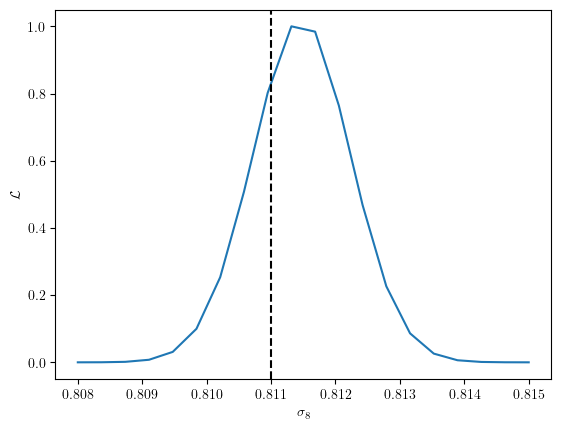

In [8]:
n = 20
sigma_8_vec = np.linspace(0.808,0.815,n)
log_lik = np.zeros(n)
for i in range(0,n):
    print(i)
    cosmo_params["sigma_8"] = sigma_8_vec[i]
    number_counts.update_params(cosmo_params,scal_rel_params)
    log_lik[i] = number_counts.get_log_lik()
lik_vec = np.exp(log_lik-np.max(log_lik))
cnc_params["sigma_8"] = 0.811
pl.figure()
pl.plot(sigma_8_vec,lik_vec)
pl.axvline(x=0.811,linestyle="dashed",color="k")
pl.xlabel("$\sigma_8$")
pl.ylabel("$\mathcal{L}$")
pl.savefig("figures/benchmark_lik.pdf")
pl.show()

In [9]:
#Goodness of fit
number_counts.cnc_params = cnc_params
number_counts.initialise()
C,C_mean,C_std = number_counts.get_c_statistic()
print("Predicted C =",C_mean,"+-",C_std)
print("Observed C =",C)

Predicted C = 27.60197044996162 +- 7.118550901545521
Observed C = 20.15722002099891


/Users/boris/Work/CLASS-SZ/SO-SZ/cosmocnc/cosmocnc/utils.py:156: RuntimeWarning: divide by zero encountered in log
  return 2.*(n_mean - n_obs + n_obs*np.log(n_obs/n_mean))
/Users/boris/Work/CLASS-SZ/SO-SZ/cosmocnc/cosmocnc/utils.py:156: RuntimeWarning: invalid value encountered in multiply
  return 2.*(n_mean - n_obs + n_obs*np.log(n_obs/n_mean))
/Users/boris/Work/CLASS-SZ/SO-SZ/cosmocnc/cosmocnc/utils.py:190: RuntimeWarning: divide by zero encountered in log
  C_var = C_var + np.exp(-n_mean)*n_mean**j/math.factorial(j)*(n_mean-j+j*np.log(j/n_mean))**2
/Users/boris/Work/CLASS-SZ/SO-SZ/cosmocnc/cosmocnc/utils.py:190: RuntimeWarning: invalid value encountered in scalar multiply
  C_var = C_var + np.exp(-n_mean)*n_mean**j/math.factorial(j)*(n_mean-j+j*np.log(j/n_mean))**2


In [10]:
#Mass estimation

cnc_params["likelihood_type"] = "unbinned"
cnc_params["observables"] = [["q_so_sim"]]
cnc_params["data_lik_from_abundance"] = False #So that the backward convolutional approach is followed (needed).
cnc_params["get_masses"] = True
number_counts.cnc_params = cnc_params
number_counts.initialise()
number_counts.get_log_lik()
number_counts.get_masses()
ln_mass_est = number_counts.cluster_lnM #ln mass estimates
ln_mass_std = number_counts.cluster_lnM_std #ln mass standard deviation
mass_true = number_counts.catalogue.M #true mass
m_x = mass_true
m_y = np.exp(ln_mass_est)

/Users/boris/opt/miniconda3/lib/python3.9/site-packages/multiprocess/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x10786c400>
  self.pid = os.fork()
/Users/boris/opt/miniconda3/lib/python3.9/site-packages/multiprocess/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x10786c3a0>
  self.pid = os.fork()
/Users/boris/opt/miniconda3/lib/python3.9/site-packages/multiprocess/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x10786c400>
  self.pid = os.fork()
/Users/boris/opt/miniconda3/lib/python3.9/site-packages/multiprocess/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x10786c3a0>
  self.pid = os.fork()
/Users/boris/opt/miniconda3/lib/python3.9/site-packages/multiprocess/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x10786c400>
  self.pid = os.fork()
/Users/boris/opt/miniconda3/lib/python3.9/site-packages/multiprocess/popen_fork.py:66: Resource

<>:16: DeprecationWarning: invalid escape sequence \o
<>:17: DeprecationWarning: invalid escape sequence \o
<>:16: DeprecationWarning: invalid escape sequence \o
<>:17: DeprecationWarning: invalid escape sequence \o
/var/folders/h0/4_tf3pcn1h32ks9grh325v400000gn/T/ipykernel_97616/247533631.py:16: DeprecationWarning: invalid escape sequence \o
  axs.set_ylabel("Mean inferred mass [$10^{14} M_{\odot}$]")
/var/folders/h0/4_tf3pcn1h32ks9grh325v400000gn/T/ipykernel_97616/247533631.py:17: DeprecationWarning: invalid escape sequence \o
  axs.set_xlabel("Input mass [$10^{14} M_{\odot}$]")


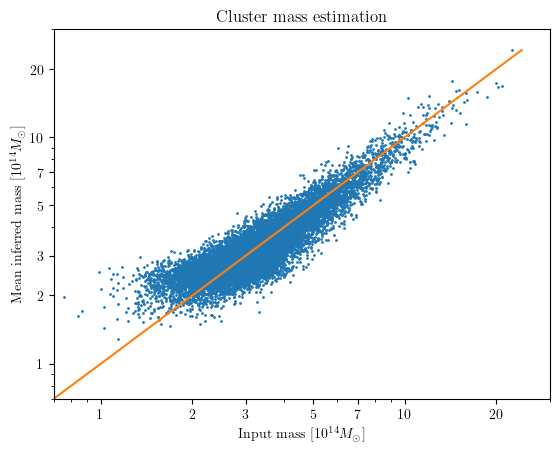

In [12]:
fig = pl.figure()#figsize=(11*cm,8*cm*2))
gs = fig.add_gridspec(1,1)#,hspace=0)
axs = gs.subplots()
axs.scatter(m_x,m_y,s=1)
x = np.linspace(np.min(m_x),np.max(m_y),100)
axs.plot(x,x,color="tab:orange")
axs.set_xscale("log")
axs.set_yscale("log")
axs.set_xlim([0.7,30.])
axs.set_ylim([0.7,30.])
custom_ticks = [1,2,3,5,7,10,20]
axs.set_xticks(custom_ticks)
axs.set_yticks(custom_ticks)
axs.set_xticklabels(custom_ticks)
axs.set_yticklabels(custom_ticks)
axs.set_ylabel("Mean inferred mass [$10^{14} M_{\odot}$]")
axs.set_xlabel("Input mass [$10^{14} M_{\odot}$]")
axs.set_title("Cluster mass estimation")
pl.savefig("figures/benchmark_masses.pdf")
pl.show()




In [13]:
#Most extreme cluster
number_counts.initialise()
number_counts.get_log_lik_extreme_value()
number_counts.eval_extreme_value_quantities()
snr_max_mean = number_counts.obs_select_max_mean
snr_max_std = number_counts.obs_select_max_std
snr_max_obs = np.max(q_obs)
print("Predicted maximum SNR",snr_max_mean,"+-",snr_max_std)
print("Observed maximum SNR",snr_max_obs)

Predicted maximum SNR 115.57641663774933 +- 24.606812765830487
Observed maximum SNR 123.7203444123371
